**Derek Zhu**, Algorithms 605.621

Copyright Johns Hopkins University.  Not for distribution online or by any other means.

# Statement of Academic Integrity

**Statement of Integrity: I, Derek Zhu, state that I completed this assignment with integrity and by myself.**

# Instructions to Students
This programming assignment is contained entirely in this IPython/Jupyter notebook. You are to read the problem from this notebook, and answer questions/make required modifications in this same notebook and submit it as a notebook.  Look for **BOLDFACE AND/OR ALL CAPS** for where to put your answers.  Do not delete the problem statements, text, etc, leave all that as-is (makes grading easier).

# Overview

[The Maryland Lighthouse Challenge](https://cheslights.org/maryland-lighthouse-challenge/) is a biennial event where people race around the state of Maryland attempting to visit all 10 historic lighthouses and one lightship spread out among the most beautiful parts of the state.  The goal is to be the first team to visit all of the lighthouses during the challenge weekend.  An EP [professor and his wife](https://www.facebook.com/cheslights/photos/a.2861267277221280/2995180270496646/?type=1&theater) have [competed very favorably](https://cheslights.org/1st-finishers-results-2019-md-lighthouse-challenge/) in this event ;-)  

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Hooper_Strait_Light%2C_St._Michaels%2C_Maryland.jpg/1920px-Hooper_Strait_Light%2C_St._Michaels%2C_Maryland.jpg" width=640><br>
<small>Hooper Strait Light, Chesapeake Maritime Museum, St. Michaels, MD (C) Wikimedia Commons</small>
</center>

The lighthouse challenge can be modeled as an instance of the *traveling salesperson problem (TSP)* that recurs frequently in networking, semiconductor layouts,and efficient routing.  This two-part problem will have you explore different strategies for identifying the fastest *tour*&mdash;the path and starting point that leads contestants to visit all lighthouses finishing at the earliest possible time, with algorithms that run in a reasonable amount of wall-clock time.

In part one, you'll implement a brute-force algorithm for *solving* TSP&mdash;in our case, the fastest tour covering all the lighthouses.  Then, you will implement a fast approximation algorithm, and study the differences between the two.

## Tasks
Specifically, you must:

1. Write the algorithms, in correct pseudocode notation.  \[This part may have been assigned on a previous or concurrent homework assignment.\]
1. Implement both algorithms correctly, in this notebook.
1. Compare/contrast algorithm performance.
1. Discuss your experiences and opportunities to improve.

## Requirements
On the first algorithm, you must implement a brute-force, recursive method that finds the quickest Hamiltonian path (fewest number of hours) that visits every lighthouse in a list of lighthouses, using supplied travel times.  

For the second algorithm, you must implement the approximation technique in the paper, [An Empirical Study of the Multi-Fragment Tour Construction Algorithm for the Traveling Salesman Problem](https://scholar.google.com/scholar?q=An+Empirical+Study+of+the+Multi-Fragment+Tour) by Krari *et al* that describes an interesting greedy algorithm that works by adding edges of increasing length to complete  the tour.

You will compare/contrast the call counts of the two approaches, and the accuracy of the results.

There are additional requirements and details further on.

## Constraints
The implementation is not collaborative.  While writing the algorithm may be a collaborative effort as indicated in one of the homework assignments, you must write your own code following the Programming Assignment Guidelines (Blackboard page Syllabus & Course Information ).  Pay careful attention to the academic integrity requirements regarding publicly available code.

Use the function signatures and any data structures as supplied&mdash;do not change function signatures or introduce strange calling conventions; the instructor's tests are written assuming these function signatures.  Further, beware of strange *side effects* that may cause bad behavior on subsequent runs of the code.  Be sure to "restart and run all" prior to submitting your notebook, as the instructor will do the same when testing.  Points will be deducted if the instructor has to make any changes in order to run your code.

The analysis and graphs must be driven with programmatically derived data, not "hard coded" or pasted in run counts.  An example of what **not** to do: xvals=[3, 4, 12, 15, 36, 47] /* hard coded */  Instead, xvals = [i for i in mycounts] where mycounts is an array updated through various trials you perform using your function(s).

As for notebook runtimes, the notebook must never exceed an execution time of FIVE WALL-CLOCK MINUTES.  If your notebook does not execute on a cloud service, such as Google Colaboratory, on the supplied instructor inputs within this time, points will be deducted.  It likely means there's a bug in your implementation.  If you have issues with this, reach out to your instructor.

# Lighthouse Challenge (100 pts total)



## Preliminaries

Implement your algorithm in the Student Implementation block(s) and code to print your results. Your code must have a reasonable, consistent, style and commented documentation. It must have appropriate data structures and modularity.

Your code must appear in this notebook (not as an external library).  You may create additional notebook cells as necessary.  If present, preserve the instructor input block, and do not change names of any of the instructor supplied variables or data structures - they will be used by the instructor when testing your code. Output must be clear and nicely formatted.

Your code should be robust and have some error checking - we won't deliberately test for unusual/nonsense conditions, but our tests will include different data than supplied here so you want to be prepared for a variety of (well-formed) input conditions.  

If present, the instructor test block will be used to test your code; if the test block runs correctly, then your code has the correct function signature, and performs well when running multiple trials.  (The instructor may change or add to the test cases during grading.)


## Assumptions
Here are some additional Lighthouse Challenge details and assumptions.

The lighthouse challenge is a race to visit all lighthouses in the shortest time possible.  Your algorithm must come up with the shortest tour that visits all lighthouses.  

Input includes:
* A list of lighthouse names ``LIGHTS``
* A travel dictionary ``TRAVEL_TIME``, indexed by two different lighthouses A and B, that returns the time in hours to drive from A to B.

Your output will be an ordered list of lighthouse names&mdash;starting at the first lighthouse in the list, and ending at the last lighthouse in the list&mdash;and a travel time in hours, rounded to the nearest hundredth of an hour.

Assume:
1. The contest requires a visit of all lighthouses once; teams start at one light and end at a different light.  ("Light" is short for lighthouse.)
1. There is a route from every light to every other light, although with possibly unique travel times.
1. Teams may start at any lighthouse, and finish at any other lighthouse.  (Your algorithm must select the optimal light to start at.)
1. Travel time from A to B is the same as the time from B to A.
1. The best route is one that has the lowest sum total travel time, from among all possible routes.


## Instructor Data Structures and Helpers

These are data structures that will be used throughout your implementation.  Although strongly cautioned against this, you can make modifications, but if present, ensure that the instructor test block functions correctly without modifications.

In [70]:
############################################################################
# INSTRUCTOR DATA STRUCTURES AND INITIAL TEST DATA directly relevant
# DO NOT CHANGE THE NAMES OR SIGNATURES OF THESE STRUCTURES OR FUNCTIONS.
############################################################################
TRAVEL_TIME = {
	('Fort Washington','Choptank River')       : 2.+3./60,
	('Fort Washington','Hooper Strait')        : 1.+56./60,
	('Fort Washington','Point Lookout')        : 1.+50./60,
	('Fort Washington','Sandy Point')          : 1.+6./60,
	('Fort Washington','Cove Point')           : 1.28,
	('Choptank River','Hooper Strait')         : 39./60,
	('Choptank River','Point Lookout')         : 3.+4./60,
	('Choptank River','Sandy Point')           : 1.+6./60,
	('Choptank River','Cove Point')            : 2.+23./60,
	('Hooper Strait','Point Lookout')          : 2.+58./60,
	('Hooper Strait','Sandy Point')            : 1.+0./60,
	('Hooper Strait','Cove Point')             : 2.+17./60,
	('Point Lookout','Sandy Point')            : 2.+7./60,
	('Point Lookout','Cove Point')             : 46./60,
	('Sandy Point','Cove Point')               : 1.+27./60,
}

# Helper Functions
def list_minus(L, x):
    """Returns a list of L that does not have x in it."""
    return list(set(L)-set([x,]))

def fix_lookup(traveltime_dict):
  """
  Accepts a traveltime_dict indexed by (a,b), and augments it to also be
  indexed by (b, a).  If your algorithm wants TRAVEL_TIME[('foo', 'bar')], and
  TRAVEL_TIME has an index only for [('bar', 'foo)], it will throw an exception.
  This method fixes that by duplicating keys and reversing their order.
  (There are Pythonic ways of doing this, such as frozensets, but that gets
  syntactically ugly.)  Note, this method changes the input dict.

  Use:
    fix_lookup(TRAVEL_TIME)
  """
  # make a temporary new dictionary w/same keys, but reversed
  TTA = {(k[1],k[0]):traveltime_dict[k] for k in traveltime_dict.keys()}
  traveltime_dict.update(TTA) # update the called dictionary

# Global Variables - the travel time and lights structures
fix_lookup(TRAVEL_TIME)
LIGHTS = list(set([item for k in TRAVEL_TIME.keys() for item in k]))

# Utility functions that you can use if you wish

def random_lighthouses(n, mintime=1, maxtime=50):
    """
    Generates a random travel dictionary and random lighthouse names.  Travel
    times vary between mintime and maxtime tenths for each pair of lights.  It
    returns the dictionary and list of lights.  The dictionary is ready to use
    for your experiments.

    Call with traveldict, lightlist = random_lighthouses(10)

    """
    NAMES=["Alpha", "Bravo", "Charlie", "Delta",  "Echo", "Foxtrot", "Golf",
       "Hotel", "India", "Juliett", "Kilo", "Lima", "Mike", "November","Oscar",
       "Papa", "Quebec", "Romeo", "Sierra", "Tango", "Uniform", "Victor",
       "Whiskey", "X-ray", "Yankee", "Zulu",]

    from random import randint, shuffle
    shuffle(NAMES)
    pairs=[(NAMES[i],NAMES[j])for i in range(n-1) for j in range(i+1,n)]
    TT = {pair:0.1*float(randint(mintime,maxtime)) \
                for pair in pairs}
    fix_lookup(TT)
    return TT, NAMES[:n]


In [71]:
# Other instructor code and helpers (decorators, call counters)

# Pretty prints a dict
def dictstr(dict):
    """
    Pretty-prints a dictionary into a string and returns it.
    An extraordinary hack from https://stackoverflow.com/a/36021359
    """
    import json
    dict_as_string={str(key):dict[key] for key in dict}
    return json.dumps(dict_as_string, indent=2)

# Decorator example for counting function calls, adapted from
# https://stackoverflow.com/a/21717396/8542716
def call_counter(f):
    """
    Adds a ".calls" variable to the function that increments w/every call.
    Set it to zero between iterations.
    Example:
        @call_counter
        def sumallbelow(x):
          if x<1:
            return 0
          return x + sumallbelow(x-1)

        ...
        sumallbelow.calls = 0 # reset before any use
        print(f"The sum up to 4 is: {sumallbelow(4)}")
        print(f"and the call counts are {sumallbelow.calls}")

    """
    def wrapped(*args, **kwargs): # deal with any/all arguments
        wrapped.calls += 1
        return f(*args, **kwargs) # call the real function here
    wrapped.calls = 0
    return wrapped

class debugprint(object):
  """
  A debug print decorator useful for tracing the flow of recursive functions.
  It adds a "debugprint" method to each function call, that increases the
  number of spaces on each call before printing the output.

  To use, add @debugprint on top of your function.  Then, within your function
  foo, put foo.debugprint("whatever"), and it will print "whatever" with
  several spaces in front of it.  Recursive calls add to the spaces.  Enable
  with "debugprint.enabled = True", and disable w/False.

  There's also a counter called ".calls," which you reset like the counter
  decorator above.  Note, enabling/disabling does not affect the counter; the
  counter is always counting.

  Example:
      @debugprint
      def fib(N):
        fib.debugprint(f"inside fib({N})")
        if N<2:
          fib.debugprint(f"returning {N}")
          return N
        fib.debugprint(f"returning fib({N-1}) + fib({N-2})")
        return fib(N-1) + fib(N-2)

      # toggle this on/off as needed
      fib.enabled, fib.calls = True, 0
      print(f"The 3rd Fibonacci number is {fib(3)}")
      print(f"Number of calls is {fib.calls}")

  Output:
      inside fib(3)
      returning fib(2) + fib(1)
        inside fib(2)
        returning fib(1) + fib(0)
          inside fib(1)
          returning 1
          inside fib(0)
          returning 0
        inside fib(1)
        returning 1
      The 3rd Fibonacci number is 2
      Number of calls is 5

  Adapted from https://stackoverflow.com/a/862915/
  Also adding a calls counter because I cannot combine decorators
  """
  calls = 0
  enabled = False
  space = ""
  def __init__(self, func):
    self.func = func
  def __call__(self, *args, **kwargs):
    if self.enabled:
      # print 'Entering', self.func.func_name
      # print '    args:', args, kwargs
      pass
    self.space += "  "
    self.calls += 1
    result = self.func(*args, **kwargs)
    self.space = self.space[:-2]
    return result
  def debugprint(self, *args, **kwargs):
    if self.enabled:
      print(self.space+" ".join(map(str,args)), **kwargs)


## Brute Force (45)
The first task is to implement a **recursive, brute force** algorithm to select the best starting lighthouse and the best path from the starting light through the rest of the lighthouses.

In particular:
* **recursive** means a function that calls itself, and not something involving nested ``for`` or ``while`` loops.  Recursion is the easiest way to solve this problem.
* **brute force** means it will need to try every combination at every step along the way.
* and finally you must find the optimal starting light.

Your code must enumerate all combinations.  Specifically, you are **not allowed** to make use of Python combinatoric libraries, or implement a separate combinatoric recursive generator.  It is inefficient, and the real solution is really not that hard.  (If you would like to check your work using combinatoric libraries, you can do that in a temporary cell, but just be sure to delete it prior to submission.)



### Brute Force Implementation
The code is structured into two pieces: a *kickoff* function to get things going&mdash;the test block will call this function&mdash;and the core recursive function that does the work.  More specifically:
* the core recursive function will take a starting light and list of (remaining) lights, and attempt to find the next best set of lights to visit to finish the tour from that point.
* the kickoff function must iterate through a list of starting lights and return the best tour overall and the best corresponding time.

Print the best tour and time, with your program selecting the best starting lighthouse for that purpose, using the ``TRAVEL_TIME`` and ``LIGHTS`` provided in the instructor data structures block above.  (Go look at it, get familiar with it.)

In [72]:
############################################################################
# STUDENT IMPLEMENTATION BLOCK
############################################################################
## Recursive Function
@call_counter
def fastest_tour_r(start_light, L, traveldict):
    """
    I will ADD TOP LEVEL COMMENTS here, and always be sure to check for errors.
    I will not change the function signature or its return parameters.
    If I have any questions, I'll ask my instructor or come to office hours.
    """

    # STUDENTS - THIS IS YOUR RECURSIVE FUNCTION - WE HAVE GIVEN SOME
    # SUGGESTED STRUCTURE, BUT YOU ARE FREE TO ADAPT THIS AS NEEDED.

    best_tour = []  # used to store the running best overall tour that starts at start_light
    best_time = float("inf") # used to store the time for the best_tour sequence

    # TERMINATION CASE
    if len(L)==0:
        # Add code to calculate the termination case here; what do you return?
        # THIS STATEMENT IS WRONG - JUST A STUB
        #return [start_light, L[0]], 10
        return [start_light], 0.00

    indent = "  "

    # RECURSIVE CASE ("else" is implied because we returned if terminating)
    for next_light in L:
            # This should recursively compute all possible tours through L
            # that begin at start_point
            indent += "  "
            L_minus = list_minus(L, next_light)
            tour, time = fastest_tour_r(next_light, L_minus, traveldict)
            indent = indent[:-2]

            total_time = time  + traveldict[(start_light, next_light)]
            # Check if this path is faster:
            if total_time < best_time:
              best_time = total_time
              best_tour = tour

            #best_tour = tour   # STUB - NOT COMPLETE/CORRECT
            # TEH BELOW IS NOT CORRECT - shows using traveldict to get time
            # time = traveldict[(start_light, L[0])]
            # best_time = time   # STUB - NOT CORRECT

            # Now finish out the calculations:
            # Remember to add the time from your start point to second_lighthouse
            # back into time and append start_light back onto the beginning of
            # the tour.  Compare this result for next_light-->(rest of the list)
            # to the previous best_tour, best_time (for all the previous
            # potential starting points).

    # Tour consists of start light plus the best sub-tour from the loop above
    #print(indent, f"return {[start_light]} + {best_tour}")  # DEBUGGING - DELETE ME
    #return [start_light] + best_tour, 10 + best_time   # STUB - NOT COMPLETE/CORRECT
    """The input for the function, return value for the base case, and return value for"""
    """the recursive case must match exactly."""

    return [start_light] + best_tour, best_time

## Kickoff Function, and Output
def fastest_tour(traveldict, lights):
    """
    I will ADD TOP LEVEL COMMENTS here, and always be sure to check for errors.
    I will not change the function signature or its return parameters.
    If I have any questions, I'll ask my instructor or come to office hours.
    """
    # accepts travel dictionary of times, and list of lights.  Note, the lights
    # must be drawn from a subset of keys in traveldict.  In plain language,
    # the travel dict must have entries for each of the lights.
    # Returns best tour, best time, in that order.

    # YOUR CODE HERE - try every light in "lights" to start with, then
    # select and return the best tour.  Here's a stub - you want to replace with
    # your own code that does the main work.
    start_light = "Derek_startlight" # NOTE! Replace this as necessary
    TTA = {(start_light,k[0]):0.00 for k in traveldict.keys()}
    traveldict.update(TTA) # update the called dictionary
    L_minus = list_minus(lights, start_light) # how to subtract a light
    fastest_tour_r.calls = 0
    best_tour, best_time = fastest_tour_r(start_light, L_minus, traveldict)

    return best_tour[1:], best_time # preserve this output signature


### Brute Force Output
The following is the output block.  (Don't need to do anything for this, I'm just trying to keep the format consistent across assignments.)

In [73]:
# print it out here just to see it working
best_tour, best_time = fastest_tour(TRAVEL_TIME, LIGHTS)
print("The best tour is: ", ', '.join(best_tour))
print(f"The best time is: {best_time:0.2f}")
print("The call counts are: ", fastest_tour_r.calls)


The best tour is:  Point Lookout, Cove Point, Fort Washington, Sandy Point, Hooper Strait, Choptank River
The best time is: 4.80
The call counts are:  1957


## Instructor Test Block

Notebooks may have a test block, like this, that the instructor will run to evaluate the correctness of your outputs. Ensure your implementation passes this initial test. The instructor will replace the inputs, and may replace the code, but for now, you should make sure this block runs, passes tests, and does not throw exceptions.

In [74]:
# INSTRUCTOR TEST BLOCK
# Pre-canned test answers for students to test against, matching specific
# TRAVEL_TIME as set in the instructor data structures area of this notebook.
#
# During grading, the instructor will replace this block with something similar.
# You are encouraged to do random testing on your own.

ans={}
ans[('Sandy Point', 'Point Lookout', 'Choptank River')] = (('Point Lookout', 'Sandy Point', 'Choptank River'),3.22)
ans[('Cove Point', 'Sandy Point', 'Hooper Strait')] = (('Cove Point', 'Sandy Point', 'Hooper Strait'),2.45)
ans[('Point Lookout', 'Hooper Strait', 'Fort Washington')] = (('Point Lookout', 'Fort Washington', 'Hooper Strait'),3.77)
ans[('Point Lookout', 'Hooper Strait', 'Cove Point', 'Sandy Point')] = (('Point Lookout', 'Cove Point', 'Sandy Point', 'Hooper Strait'),3.22)
ans[('Hooper Strait', 'Fort Washington', 'Point Lookout', 'Choptank River')] = (('Point Lookout', 'Fort Washington', 'Hooper Strait', 'Choptank River'),4.42)
ans[('Choptank River', 'Hooper Strait', 'Fort Washington')] = (('Choptank River', 'Hooper Strait', 'Fort Washington'),2.58)
ans[('Hooper Strait', 'Fort Washington', 'Sandy Point')] = (('Hooper Strait', 'Sandy Point', 'Fort Washington'),2.10)
ans[('Point Lookout', 'Cove Point', 'Fort Washington')] = (('Point Lookout', 'Cove Point', 'Fort Washington'),2.05)
ans[('Fort Washington', 'Cove Point')] = (('Fort Washington', 'Cove Point'),1.28) # special case - 2 lights
ans[('Cove Point', 'Point Lookout', 'Fort Washington', 'Sandy Point')] = (('Point Lookout', 'Cove Point', 'Fort Washington', 'Sandy Point'),3.15)

# If you would like to visualize this last test case, see here:
# https://goo.gl/maps/Lob2GLZfzPryCUWk6
# Any other arrangement involves backtracking.  Other cases of TSP will not
# be as obvious.

fix_lookup(TRAVEL_TIME)

# exercise all the canned cases and ensure equal times to 1/100th of an hour
passed = 0
for k in ans.keys():
  btour, btime = fastest_tour(TRAVEL_TIME, list(k)) # student's kickoff function
  if (tuple(btour) == ans[k][0] or tuple(btour[::-1]) == ans[k][0]) \
     and abs(btime - ans[k][1]) < 0.01:
      passed += 1
  else:
      print(f"FAILED case {k}")
      print(f"    got time {btime:0.2f} expected time {ans[k][1]}")
      print(f"    output tour was {tuple(btour)} expected {ans[k][0]}")
print(f"Passed {passed} of {len(ans)} canned tests.")


Passed 10 of 10 canned tests.


## Analysis (30)
To estimate the computational complexity of your algorithm, you will need to run it against a number of different scenarios and capture a measure of the work done for each run.  Using the provided utility function, generate random sets of 3-10 lighthouses and then run your algorithm on them.  Gather the execution steps that your algorithm expends on them and then plot the results.  Finally, provide an analysis of your algorithm's running time and performance.  

<font color='red'>Note, this analysis is just for the performance of the brute force algorithm.  (Multi-Factor has its own analysis section later on.)</font>

As with every programming assignment this semester, *running time* implies execution steps, not clock time, versus size of the input data.  Use the counts of the ``dist()`` function as collected above, and plot over various trial cases using the graph below.  (You may use this graph code for future assignments, or you can put in your own, as long as it is reasonable.)

Think: what goes on the x axis?  What goes on the y axis?  How do you modify your code above to exercise the different inputs?  Label the axes, use the right data, make this look *professional.*  Also, pay attention to the asymptotic bounds.  Compare simple to improved on the same graph.

***Then, write a description below the figure of what is happening.***

Please note, graphs must tell a story.  The better your graph is, the more descriptive, (appropriate scale to "zoom in" on the required features), the better the story it tells.  Use colors, points, symbols, a good key, good labels, make this look professional.  If you are comparing two alternatives, find a way to overlay their runs on a single graph.  Really, really try to sell me on your results.

Things to consider:
* How many points do you plot?  Notice there are too many red x's.
* Which bounding functions do you include?  Not all of them.  Can you "bring them in a little" to make them tighter to your function?

You may reuse this plot style on future assignments, or augment it as you wish.  Tell us a good story!  **Don't forget the writeup.**


### Data Collection
Run repeated tests over input sizes N to collect data for your plot.  Then, modify the code in the Plot section to display these run counts.

In [75]:
# MY CODE BLOCK TO EXPERIMENT WITH 3-10 LIGHTHOUSES AND GATHER EXECUTION STEPS

In [76]:
def generatedata(n):
  test_data= [0,]
  for i in range(2, n):
    dictation, lights = random_lighthouses(i, 1, 50)
    best_tour, best_time = fastest_tour(dictation, lights)
    # print("The best tour is: ", ', '.join(best_tour))
    # print(f"The best time is: {best_time:0.2f}")
    # print("The call counts are: ", fastest_tour_r.calls)
    # print("")
    test_data.append(log2(fastest_tour_r.calls))
  # print("The call counts are: ", test_data)
  return test_data


### Plot
Make adjustments to the code below.  Plots must tell a story.

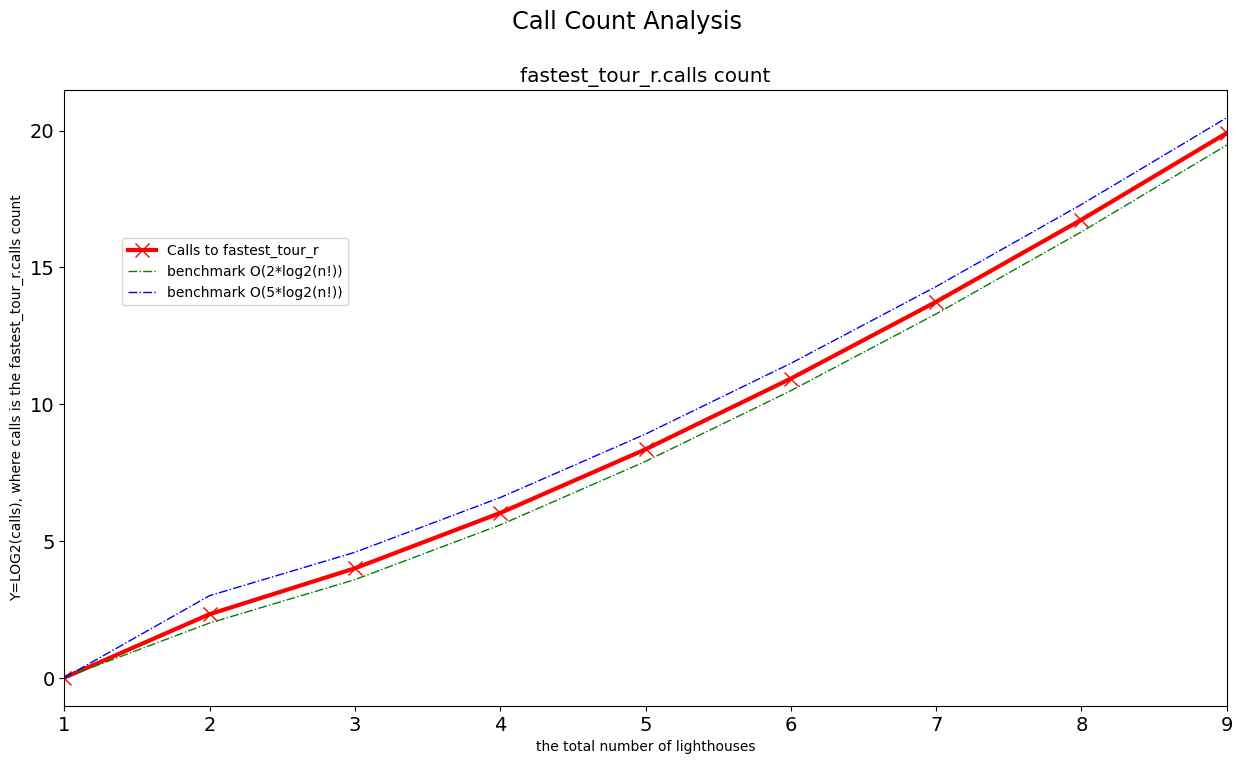

In [77]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial

# Let myruncounts[i] be count of calls for POINT array of size i
myruncounts = generatedata(10) #[0.8*x**1.9 for x in range(100)] # your data here

# benchmark data set generation
yTestVals1 = [0,] # linear for O(n)
yTestVals2 = [0,] # quadratic for O(n^2)
yTestVals3 = [0,] # n*log(n) for O(nlog(n))
yTestVals4 = [0,] # 5*n*log(n) for O(nlog(n))

# generate bench mark data for O(n), O(n^2), O(nlog(n)), O(10*nlog(n)), and O(n!)
for i in range(2, len(myruncounts)+1):
    yTestVals1.append(log2(2*factorial(i)))
    yTestVals2.append(log2(4*factorial(i)))

# %matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
fig, (ax1) = plt.subplots(1, 1)
ax1.set_xlim([1, len(myruncounts)])
fig.suptitle('Call Count Analysis', size="xx-large")
ax1.set_title('fastest_tour_r.calls count', size="x-large")
ax1.plot(range(1,len(myruncounts)+1), myruncounts, "rx-", markersize=10, linewidth=3, label="Calls to fastest_tour_r")
ax1.plot(range(1,len(myruncounts)+1), yTestVals1, "g^-.", markersize=0, linewidth=1, label="benchmark O(2*log2(n!))")
ax1.plot(range(1,len(myruncounts)+1), yTestVals2, "b^-.", markersize=0, linewidth=1, label="benchmark O(5*log2(n!))")
ax1.set(xlabel = 'the total number of lighthouses', ylabel = 'Y=LOG2(calls), where calls is the fastest_tour_r.calls count')
ax1.legend(loc=(0.05,0.65), scatterpoints=1)
ax1.tick_params(axis="both", which="major", labelsize=14)

### Writeup
**HERE IS MY EXPLANATION OF WHAT IS HAPPENING ABOVE.  WHAT IS THE THEORETICAL RUNNING TIME OF THE ALGORITHM? MY RUNNING TIME IS $O(n), \Theta(n)$, or  $\Omega(n)$, AND BRIEFLY WHY...**

MY EXPLANATION: The theoretical running time of the algorithm is $\Theta(n)$, becasue it checks all the possible path permutation which is n!.


**Here is what the plot shows.** Remember, plots (and your writeup) must tell a (short) story.

The plot shows that log2(calls counts) is upper-bounded by 5log2(n!) and lower-bounded by 2log2(n!), that means the call counts is upper-bounded by 5n! and lower-bounded by 2n!, henece the call counts is $\Theta(n!)$, which confirms the theoretical running time of the algorithm.

## Multi-Fragment (15 points)
The Traveling Salesperson Problem is in the family of NP Complete problems.  As such, there is no known deterministic polynomial time solution to it.  However, people over the years have come up with approximations that run in polynomial time, and some run fairly efficiently, but with a tradeoff in accuracy.

The paper, [An Empirical Study of the Multi-Fragment Tour Construction Algorithm for the Traveling Salesman Problem](https://scholar.google.com/scholar?q=An+Empirical+Study+of+the+Multi-Fragment+Tour) by Krari *et al*, describes an interesting greedy algorithm that works by adding edges of increasing length to fill out the tour.

For this part:
* implement the Multi-Fragment approximation method in Python, adapted to the Lighthouse challenge, and the required Union-Find algorithm as a helper for it
* compare accuracy vs. the brute-force algorithm in terms of tour time

(By "adapted to the Lighthouse challenge," our tours are not a cycle$-$they do not return to the starting point.)

There is one trick to this part - Algorithm 3 of the paper returns a list of edges (and times) that belong to the tour, but it does not put the edges in the correct tour order.  It just tells you the edges that belong.  

Since we're only comparing accuracy, *we don't need to know the exact tour* and therefore we do not have to worry about that.

### Union-Find Implementation
The implementation requires two parts.  First, implement Union-Find below.  

As this part is central to the assignment, you **must** write code for this yourself, and **not** load Python modules or download other implementations.  You may refer to outside resources for tips on the algorithm.

As usual, do not change the function signatures.

Use the test block by changing the if statement to "if True:" to make sure your implementation works as expected.  Feel free to add additional testing to check for unions of fragments, unions of singletons with fragments, and so on.


In [78]:
# My Union-Find Implementation

class DisjointSet:
    def __init__(self):
        self.parent = {}
        self.rank = {}

    def make_set(self, x):
        """
        Create a new set containing element x.
        """
        self.parent[x] = x
        self.rank[x] = 0

    def find(self, x):
        """
        Find the representative of the set containing x with path compression.
        """
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Path compression
        return self.parent[x]

    def union(self, x, y):
        """
        Merge the sets containing x and y using union by rank.
        """
        rootX = self.find(x)
        rootY = self.find(y)

        if rootX != rootY:
            # Union by rank
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1

# # Example usage
# ds = DisjointSet()
# lightList = [1, 2, 3, 4, 5]  # Example list of lights

# # Create sets for each light in lightList
# for light in lightList:
#     ds.make_set(light)

# # Union all sets
# for i in range(len(lightList) - 1):
#     ds.union(lightList[i], lightList[i + 1])

# # Check the representative of each element to confirm all are united
# for light in lightList:
#     print(f"Representative of {light} is {ds.find(light)}")


ds = DisjointSet()

def MAKESET(lightList):
  """
  Creates a dictionary of lights that are themselves indexed by lights, such
  that dict['light'] --> 'some other light' that is acting as its parent.
  Input is a list of strings.  Output is the dict of parents.

  If you need help, look at:
  https://en.wikipedia.org/wiki/Disjoint-set_data_structure
  """
  parentOf = {} # PUT YOUR CODE HERE TO MAKE THE REQUIRED DICTIONARY

  # Create sets for each light in lightList
  for light in lightList:
      ds.make_set(light)

  # Union all sets
  # for i in range(len(lightList) - 1):
  #     ds.union(lightList[i], lightList[i + 1])

  for light in lightList:
    parentOf[light] = ds.find(light)

  return parentOf

def FINDPARENT(light, parentOf):
  """
  Finds the parent of 'light' in lightDict.  The dictionary lightDict must have
  been created by a previous call to MAKESET.  Returns the 'light parent'
  corresponding to 'light.'  (Could be itself, depending.)  As a hint, you
  have to walk the list of parents; you might want to update any parents you
  find along the way.  See "path compression" in the link above.

  Output is the parent of light.  Note, this modifies parentOf.
  """
  # retparent = 'some string here' # PUT YOUR CODE HERE

  parentOf[light] = ds.find(light)

  retparent = parentOf[light]

  return retparent

def UNION(light1, light2, parentOf):
  """
  Makes light1 have the same parent as light2.  Output is True, and it
  modifies parentOf.  Ensure you test this adequately.
  """

  # PUT YOUR CODE HERE
  ds.union(light1, light2)
  parentOf[light1] = ds.find(light1)
  parentOf[light2] = ds.find(light2)

  return True

# Simple testing - change to "if True:" to run the tests.  Uncomment the prints
# as necessary.
if True:
  print("testing union-find things...")
  P = MAKESET(['a', 'b', 'c', 'd'])
  print(f"initial parent dict is: \n{dictstr(P)}")
  pa = FINDPARENT('a', P)
  pb = FINDPARENT('b', P)
  # should have different parents initially
  if pa == pb:
    print(f"ERROR - fail on fresh findparent - expected {pa} != {pb}")

  # combine the two singletons
  UNION('a', 'b', P)
  print(f"parent dict after union 'a', 'b' is: \n{dictstr(P)}")
  pa = FINDPARENT('a', P)
  pb = FINDPARENT('b', P)
  # should now have the same parent
  if pa != pb:
    print(f"ERROR - fail on unioned findparent - expected {pa} == {pb}")

  # create a separate fragment c, d, then union those and ensure same parents
  UNION('c', 'd', P)
  print(f"parent dict after union 'c', 'd' is: \n{dictstr(P)}")
  pc, pd = FINDPARENT('c', P), FINDPARENT('d', P)
  # post-union, they should have the same parent
  if pc != pd:
    print(f"ERROR - fail on sepfrag findparent - expected {pc} == {pd}")

  # now union the two fragments together - CRITICAL that this works
  UNION('b', 'd', P)
  print(f"parent dict after union 'b', 'd' is: \n{dictstr(P)}")
  pa, pd = FINDPARENT('a', P), FINDPARENT('d', P)
  # even though 'a' was not explicitly unioned, its parent must be 'd's parent
  if pa != pd:
    print(f"ERROR - fail on unionfrag findparent - expected {pa} == {pd}")

  # if you reparent a child, then the parent needs to move, too.
  # e.g., a, b, c --> p1, and d --> p2.  If union c and d, then p1 should share
  # parent with p2.
  P = MAKESET(['a', 'b', 'c', 'd'])
  UNION('a', 'b', P)
  UNION('c', 'd', P)
  UNION('a', 'c', P)
  print(f"parent dict after reparent test is: \n{dictstr(P)}")
  # ensure both a and b have same parent as c and d
  # ensure all now have same parent after a search
  _ = [FINDPARENT(v,P) for v in P]
  if not len(set([P[x] for x in P])) == 1:
    print(f"ERROR - fail common parent abcd - \n{dictstr(P)}")

  # lengthy test; assume a -> b -> c -> d, move b -> e, test c
  P = MAKESET(['a', 'b', 'c', 'd', 'e'])
  UNION('a', 'b', P)
  UNION('b', 'c', P)
  UNION('c', 'd', P)
  UNION('a', 'e', P)
  print(f"parent dict after reparent test is: \n{dictstr(P)}")
  # ensure all now have same parent after a search
  _ = [FINDPARENT(v,P) for v in P]
  if not len(set([P[x] for x in P])) == 1:
    print(f"ERROR - fail common parent abcde - \n{dictstr(P)}")

  print(f"completed testing.")


testing union-find things...
initial parent dict is: 
{
  "a": "a",
  "b": "b",
  "c": "c",
  "d": "d"
}
parent dict after union 'a', 'b' is: 
{
  "a": "a",
  "b": "a",
  "c": "c",
  "d": "d"
}
parent dict after union 'c', 'd' is: 
{
  "a": "a",
  "b": "a",
  "c": "c",
  "d": "c"
}
parent dict after union 'b', 'd' is: 
{
  "a": "a",
  "b": "a",
  "c": "c",
  "d": "a"
}
parent dict after reparent test is: 
{
  "a": "a",
  "b": "a",
  "c": "a",
  "d": "c"
}
parent dict after reparent test is: 
{
  "a": "a",
  "b": "a",
  "c": "a",
  "d": "a",
  "e": "a"
}
completed testing.


### MF Implementation
Now implement the Multi-Factor Algorithm itself.  This is largely Algorithm 3 in the paper.  Use the same function signature as before (the kickoff function), but rename it as defined below.  

Add code (with comments) to make this work.  You will need your correctly functioning Union-Find methods to help with one of the conditions stated in Algorithm 3.  

Note that we do not care about the specific tour, but we will return the edges as part of the tour.  If you want, you can reassemble the edges outside of the function to make a tour.  The important thing is the total time for the tour.

In [110]:
# My Multi-Fragment Tour Code


def sortedEdges(L, TRAVEL_TIME):
    """
    Takes a list of lighthouse names L and a dictionary TRAVEL_TIME of travel times,
    and returns a sorted edge list based on travel time.
    """
    E = []

    # Create edges
    for i in range(len(L)):
        for j in range(i + 1, len(L)):
            current_edge = (L[i],L[j])
            E.append(current_edge)
    sorted_edges = sorted(E, key=lambda edge: TRAVEL_TIME[edge])
    return sorted_edges

# Example usage
# test_travel_time, test_lights = random_lighthouses(9, 1, 50)
# print(test_travel_time)
# sorted_edges = sortedEdges(test_lights, test_travel_time)
# for edge in sorted_edges:
#     print(edge, test_travel_time[edge])




def is_edge_closing_path(T, edge):
    """
    Helper function to check if adding an edge will form a cycle.
    T is the current list of edges forming a path.
    edge is the new edge to be added.
    n is the total number of nodes.
    """
    parent = {}
    rank = {}

    def make_set(x):
        parent[x] = x
        rank[x] = 0

    def find(x):
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]

    def union(x, y):
        rootX = find(x)
        rootY = find(y)
        if rootX != rootY:
            if rank[rootX] > rank[rootY]:
                parent[rootY] = rootX
            elif rank[rootX] < rank[rootY]:
                parent[rootX] = rootY
            else:
                parent[rootY] = rootX
                rank[rootX] += 1
            return False
        return True

    nodes = set()
    for u, v in T:
        nodes.add(u)
        nodes.add(v)
        if u not in parent:
            make_set(u)
        if v not in parent:
            make_set(v)
        union(u, v)

    u, v = edge
    if u not in parent:
        make_set(u)
    if v not in parent:
        make_set(v)

    return union(u, v)

def MF_heuristic(E, travel_time):
    """
    Input: E is a sorted set of edges; travel_time is a dictionary giving the travel time between two nodes.
    Output: A list of edges having the shortest travel time to visit all nodes of the given edges.
    """
    T = []
    n = len(set([node for edge in E for node in edge]))  # number of unique nodes

    for e in E:
        u, v = e

        # Check if the edge is closing a path and the current size of T is less than n
        if is_edge_closing_path(T, e) and len(T) < n:
            continue

        # Check if the edge has a node already connected to two others
        node_degree = {}
        for edge in T:
            node_degree[edge[0]] = node_degree.get(edge[0], 0) + 1
            node_degree[edge[1]] = node_degree.get(edge[1], 0) + 1

        if node_degree.get(u, 0) >= 2 or node_degree.get(v, 0) >= 2:
            continue

        # Check if the edge is closing a path and the current size of T is equal to n
        if is_edge_closing_path(T, e) and len(T) == n:
            T.append(e)
            return T

        T.append(e)

    return T

# Example usage
# E = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E')]
# travel_time = {
#     ('A', 'B'): 10, ('A', 'C'): 15, ('B', 'C'): 5, ('C', 'D'): 7, ('D', 'E'): 8,
#     ('B', 'A'): 10, ('C', 'A'): 15, ('C', 'B'): 5, ('D', 'C'): 7, ('E', 'D'): 8
# }

# sorted_edges = sorted(E, key=lambda edge: travel_time[edge])


# print("sorted_edges path edges:")
# for edge in sorted_edges:
#     print(edge, test_travel_time[edge])




# print("-------")
# best_tour_edges = MF_heuristic(edges, len(lights))
# for edge in best_tour_edges:
#     print(edge)

# print("-------")
# best_tour, best_time = fastest_tour(diction, lights)
# for edge in best_tour:
#     print(edge)

# edges_sorted = sorted(edges, key=lambda x: x[2])  # Sort edges by travel time
# n = 5  # Total number of nodes

# n = len(lights)  # Total number of nodes
# result = MF_heuristic(edges_sorted, n)
# print("Fastest possible path edges:")
# for edge in result:
#     print(edge)


def fastest_tour_multifragment(traveldict, lights):

  best_tour_edges = [] # list of edges; they might not be in any order
  best_time = float(0.0)

  sorted_edges = sortedEdges(lights, traveldict)
  best_tour_edges = MF_heuristic(sorted_edges, test_travel_time)

  for edge in best_tour_edges:
    # print(edge, test_travel_time[edge])
    best_time += traveldict[edge]

  return best_tour_edges, best_time

# test code
test_travel_time, test_lights = random_lighthouses(6, 1, 50)
est_tour_edges, fastest_tour_multifragment_time = fastest_tour_multifragment(test_travel_time, test_lights)
print("Total time for MF_heuristic:", fastest_tour_multifragment_time)


best_tour, fastest_tour_time = fastest_tour(test_travel_time, test_lights)
print("Total time for fastest_tour:", fastest_tour_time)

diff = (fastest_tour_time - fastest_tour_multifragment_time)/ fastest_tour_time
print("diff:", diff)

Total time for MF_heuristic: 6.2
Total time for fastest_tour: 6.2
diff: 0.0


### MF Experiment
Now compare the *pessimistic average accuracy* of the MF algorithm to that of your brute force approach, in terms of reported tour time.  (For this experiment, we ignore the actual tour order itself, and just assume that if both brute force and MF find a tour of X hours, then it's the same and thus optimal tour.)

The wrinkle here is we want to know only how bad things can get.  Therefore, as you do experiments, throw out all the cases where multifactor matches brute, but do collect data on cases where multifactor is different.

**Run experiments** over different sized sets of  lighthouses, from 4 up to and including 9 *but no higher*.  That is, your loop range variable should be ``range(4,10)``.

For each length N:
* Create fresh random lighthouses with the random_lighthouses(n) function
* Run your brute force implementation to collect the "ground truth" number of hours
* Run your MF implementation on the same input set of lights, and collect the number of hours.  
* If the reported MF time is greater than 0.01 from brute, then add brute's hours to a ``bf_total`` variable and then add MF's hours to ``mf_total``.
* Repeat the above steps to collect up to 20 samples, then calculate the difference as $(T_{mf}+T_{bf})/T_{bf} - 2$ and report that (if they match, it will be $2/1 - 2 = 0$ which is a growth of 0%; twice as long is $3/1 - 2 = 1$ or growth of 100%, etc.).  This will reflect the average overestimate of MF, useful for knowing how bad MF can get.
* Constrain the overall number of loops per trial to stay within the stated execution time limits of this assignment.
* Output a list of these differences indexed by size N.

Here's an (extreme growth) example of where it goes wrong; can you see where the problem is?  BF is the brute force time and tour, MF similar.
```
BF time 4.30 ['Charlie', 'Victor', 'India', 'Tango']
     MF 6.10 ['Charlie', 'India', 'Victor', 'Tango']
 growth 0.419
    MF list of edges:
  0.90, ('Victor', 'India')
  1.00, ('Tango', 'Victor')
  1.40, ('Charlie', 'Victor')
  2.00, ('Tango', 'India')
  4.20, ('Charlie', 'India')
  4.60, ('Charlie', 'Tango')
```

To help you with this task, the code block below contains a pattern for a loop and experiment system that only measures desired effects a constrained number of times.  It simulates a coin tossing experiment.  You may replace this with your own lighthouse experiment code.

In [124]:
# My Experiment Code
# traveldict, lights = random_lighthouses(3)  # 3 random lighthouses, for example
# print(dictstr(traveldict)) # in the helpers... pretty prints any dictionary

"""
Here's a pattern for data collection that reports data only for "meaningful"
trials, but only makes 1000 attempts total per experiment.

We're stubbing in a fake experiment function - you can replace with your own
code.  The experiment function takes in the control variable, and will collect
data from a certain number of trials, but only make a fixed number of attempts.
If it cannot get the effect in that number of attempts, it bails out and
returns a default value.
"""
from random import randint
def experiment(n, samples, maxtries=1000):
  """
  Hypothetical experiment.  Flip a coin n times, return total number of heads
  over the given number of samples only if more than 5 heads.

  The experiment repeatedly tries until it sees an effect.  However, to avoid
  infinite loops, it only tries for a while before giving up and returning 0.
  """
  tries = maxtries # make at most 1000 attempts
  samps = samples
  totheads = 0 # summed outcome of the experiment
  print(f"  experiment {n}: ", end="") # the "end" suppresses the newline
  bf_total = 0 # total time for brute force
  mf_total = 0 # total time for multifactor

  test_travel_time, test_lights = random_lighthouses(n, 1, 50) # create lighthouses
  best_tour, fastest_tour_time = fastest_tour(test_travel_time, test_lights) # run brute force

  # print("Total time for fastest_tour:", fastest_tour_time)
  while samps > 0 and tries > 0: # go until we get samples OR we give up
    tries = tries - 1

    best_tour_edges, fastest_tour_multifragment_time = fastest_tour_multifragment(test_travel_time, test_lights)
    # print("Total time for MF_heuristic:", fastest_tour_multifragment_time)
    diff = (fastest_tour_multifragment_time - fastest_tour_time )
    if diff <= 0.01:
      continue # will jump to top of while loop and run it again, up to 1000

    # otherwise, we have a result; update the experiment data
    samps = samps - 1
    print(".", end="") # print a progress dot on success
    bf_total = bf_total + fastest_tour_time
    mf_total = mf_total + fastest_tour_multifragment_time

  if bf_total != 0.0:
    totheads = (bf_total + mf_total)/bf_total - 2

  print(f" returning {totheads} over {samples-samps} samples")
  return totheads

# Main kickoff code for the data collection
SAMPLES = 20 # want up to 20 data points
TRIES = 1000 # but only make this many attempts at the 20 samples
NRANGE = range(4,10)
resultsOf = []
for N in NRANGE:
  oneTrial = experiment(N, SAMPLES, TRIES)
  resultsOf.append(oneTrial) # build our answer list

print(f"We have some results.  They are:")
# some things in Python, you just have to get used to...
s=", ".join([f"{n+NRANGE[0]}:{v:0.3f}" for n,v in enumerate(resultsOf)])
# ... the above says, "create a big string out of smaller strings, where
# each smaller string is the number n, colon, the value v, for every result
# taken from array resultsOf."
print(s)


  experiment 4:  returning 0 over 0 samples
  experiment 5:  returning 0 over 0 samples
  experiment 6: .................... returning 0.060606060606060996 over 20 samples
  experiment 7:  returning 0 over 0 samples
  experiment 8:  returning 0 over 0 samples
  experiment 9: .................... returning 0.010416666666666519 over 20 samples
We have some results.  They are:
4:0.000, 5:0.000, 6:0.061, 7:0.000, 8:0.000, 9:0.010


### MF Writeup
**State your findings on accuracy** and if you collected them, execution steps.

Points to make:
* What was the overall accuracy?  
* Did accuracy improve, worsen, or stay the same with larger N?
* For the so-called $64K question, how do your overall average results compare with what is reported in the caption of Table 1 in the paper?
* Finally, and you don't have to answer, I just want you to think about it - is there a way to improve Multi-Fragment, e.g., using randomness?

Congratulations - you just verified a result in a published conference paper!

**MY RESULTS**

## Retrospection (10 pts)
Talk about how you did on this assignment.  This is just feedback to the instructor.  You can edit this cell and answer inline in non-bold.  Please go into some detail.
* **What was the last bug you found and fixed?** my detailed discussion of a bug; this assignment might not be so bad, but there may be some tricky cases on future ones
* **What are some late-breaking ideas you had for improving your implementation, that maybe you didn't have time to implement?** my thoughts
* **What did you feel you learned from this assignment?** my thoughts
* **How would you improve this assignment for future semesters?** my thoughts

If there's anything else you'd like to say, feel free to write it.


# Citations
Cite any help you received and any sources you referenced here

# Submission Reminders

Submit to Blackboard per instructions found on Blackboard.  In most cases, you just upload your ipynb file.  Before you do that,


* "restart and run all" before submitting.  Make sure it runs and does not throw exceptions, even if it does not pass all the test cases.  The grader "restarts and runs all" and expects it to run completely through.  We have graded many assignments where the student has done only a partial run, or run things out of order, leaving around old variables that give false results, only to have it throw an exception or give a different answer when the grader runs it.

* Rerun your code blocks, make sure you get the same answer each time.  The instructor's test block makes repeated calls to your code, and if you've left a stray variable that doesn't get cleared, it could affect the results.  

* Make sure you've completed every task in this notebook.

* If there's a plot required, make sure it's legible, axes correctly labeled, and that it "tells a story" about what is being shown.

* Double check that you have not changed the function signature.

* Include a statement of academic integrity in the block at the top.  

* Put your name at the top.

# Additional Info

Once you conquer the Maryland course, [it's onto New Jersey!](https://lighthousechallengenj.com/challenge-sites)  You can win, with algorithms!